# Airbnb Property Listing - Image Data Preparation

## Library Imports

In [2]:
import os
from zipfile import ZipFile
from PIL import Image
from tqdm import tqdm

import pandas as pd
import numpy as np

In [3]:
if not os.path.exists('./airbnb-property-listings.zip'):
    !wget "https://aicore-project-files.s3.eu-west-1.amazonaws.com/airbnb-property-listings.zip"

## Image data exploration

In [4]:
zip_filename = './airbnb-property-listings.zip'
with ZipFile(zip_filename) as myzip:
    img_filenames = myzip.namelist()

img_filenames_copy = img_filenames.copy()

for filename in img_filenames_copy:
    if filename[-1] == '/' or filename[-3:] == 'csv':
        img_filenames.remove(filename)


n_imgs = len(img_filenames)
n_imgs

4700

In [5]:
img_filenames[1]

'AirbnbDataSci/images/002717f3-3d2b-44f6-aa98-bc904670883e/002717f3-3d2b-44f6-aa98-bc904670883e-b.png'

In [6]:
img_info = {'img_id': [], 'size_x': [], 'size_y': [], 'channels': []}

with ZipFile(zip_filename) as myzip:
    for img_filename in tqdm(img_filenames):
        image = myzip.open(img_filename)
        im = Image.open(image)
        x, y = im.size
        img_info['img_id'].append(img_filename)
        img_info['size_x'].append(x)
        img_info['size_y'].append(y)
        img_info['channels'].append(im.mode)
        

img_info_df = pd.DataFrame(img_info)

100%|██████████| 4700/4700 [00:02<00:00, 1573.44it/s]


In [7]:
img_info_df.channels.value_counts()

RGB    4699
1         1
Name: channels, dtype: int64

In [8]:
img_info_df.query("channels == '1'")

,img_id,size_x,size_y,channels
2897,AirbnbDataSci/images/a1b83e34-1a30-4667-a88b-a...,720,540,1


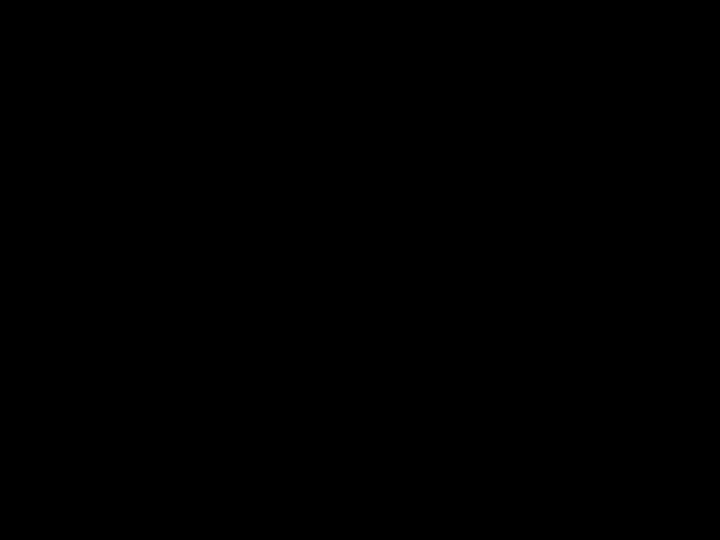

In [9]:
# Can delete the rogue black image

with ZipFile(zip_filename) as myzip:
    rogue_filename = img_info_df.query("channels == '1'").img_id.values[0]
    img = myzip.open(rogue_filename)
Image.open(img)

In [10]:
img_info_df.describe()

,size_x,size_y
count,4700.0,4700.000000
mean,720.0,581.700426
std,0.0,191.538697
min,720.0,156.000000
25%,720.0,480.000000
50%,720.0,539.000000
75%,720.0,540.000000
max,720.0,1600.000000


In [11]:
min_height_image = img_info_df.size_y.min()
min_height_image

156

In [55]:
def resize_image(im):
    x, y = im.size
    ratio = x/y
    new_y = min_height_image
    new_x = int(ratio * new_y)
    return im.resize((new_x, new_y))

if not os.path.exists('./processed_images'):
    os.makedirs('./processed_images')

with ZipFile(zip_filename) as myzip:
    for filename in tqdm(img_filenames):
        img_id = filename.split('/')[2]
        
        if not os.path.exists(f'./processed_images/{img_id}'):
            os.makedirs(f'./processed_images/{img_id}')
        
        if filename != rogue_filename:
            img_filename = filename.split('/')[-1]
            image = myzip.open(filename)
            im = resize_image(Image.open(image))
            im.save(f'./processed_images/{img_id}/{img_filename}')
    

100%|██████████| 4700/4700 [02:15<00:00, 34.73it/s]


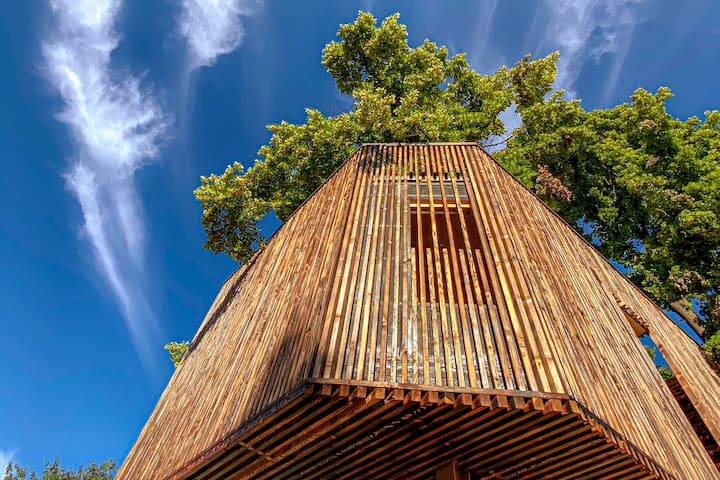

In [13]:
with ZipFile(zip_filename) as myzip:
    filename = img_filenames[0]
    img = myzip.open(filename)
Image.open(img)

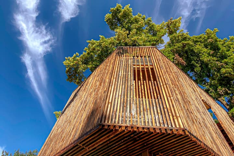

In [17]:
# filename = img_filenames[0]
img_id_0 = img_filenames[0].split('/')[-2]
img_filename_0 = img_filenames[0].split('/')[-1]
processed_img_0_path = f'./processed_images/{img_id_0}/{img_filename_0}'
Image.open(processed_img_0_path)